**Questão 1**

Dado o conjunto de dados gas.csv, carregue-o em um DataFrame e, em seguida:

1.Visualize suas cinco primeiras linhas e imprima suas colunas.

2.Obtenha a emissão mínima e máxima de gases ao longo de todo o período de observação.

3.Crie uma nova coluna no DataFrame que contenha apenas o ano (como int) presente na coluna DATE.

4.Faça um agrupamento no DataFrame com o intuito de obter qual foi o ano que apresentou, em média, uma emissão máxima de gases.

5.Crie um gráfico de barras que apresente a emissão média de gases entre os anos de 1980 e 2019.

In [23]:
import pandas as pd

df = pd.read_csv('gas.csv')
df = pd.DataFrame(df)

In [24]:
df

,DATE,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133
...,...,...
960,2019-01-01,123.7687
961,2019-02-01,113.0736
962,2019-03-01,106.6538
963,2019-04-01,88.6460


In [11]:
df.head()

,DATE,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133


In [12]:
df.columns

Index(['DATE', 'IPG2211A2N'], dtype='object')

In [25]:
df['IPG2211A2N'].max()

128.9071

In [26]:
df['IPG2211A2N'].min()

3.3842

In [32]:
df['YEAR'] = df['DATE'].apply(lambda date: date.split('-')[0])
df['YEAR']

0      1939
1      1939
2      1939
3      1939
4      1939
       ... 
960    2019
961    2019
962    2019
963    2019
964    2019
Name: YEAR, Length: 965, dtype: object

In [74]:
import numpy as np
df_year_gas = df.groupby('YEAR').agg({ 'IPG2211A2N': np.mean}).sort_values(by='YEAR', ascending=False)

In [78]:
df_agrupado = df_year_gas.loc[:'1980'] 
df_agrupado

,IPG2211A2N
YEAR,
2019,104.903940
2018,105.929333
2017,101.516308
2016,102.296433
2015,102.741442
2014,103.507850
2013,102.204350
2012,99.999983
2011,102.373875


AttributeError: module 'numpy' has no attribute 'invert_yaxis'

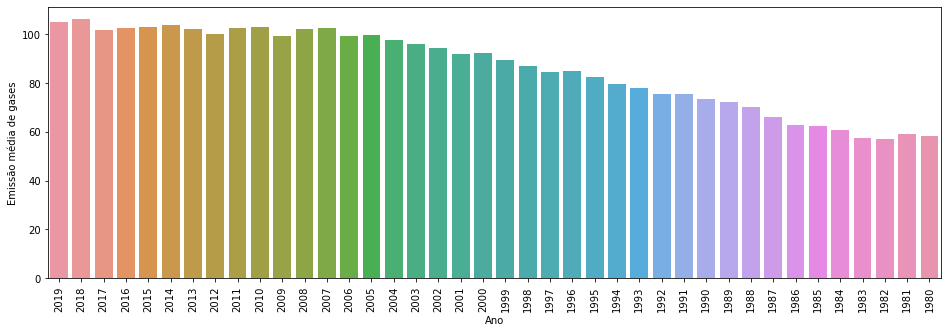

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 5))

sns.barplot(x=df_agrupado.index, y='IPG2211A2N', data=df_agrupado)
plt.xticks(rotation=90)
plt.ylabel('Emissão média de gases')
plt.xlabel('Ano')
#plt.xticks(rotation=45)
#pq não está funcionando a rotação?
plt.show()


In [270]:
import plotly.express as px
px.line(df_year_gas.loc[:'1980'])


**Questão 2**

Com a tabela de vendas de jogos de vídeo-games (videogames.csv), indique:


1.Quais jogos estão no Top 10 de Vendas Globais, considerando apenas aqueles pertencentes às plataformas PS3, Wii, X360 e PC.

2.A proporção (percentual) de jogos criados por gênero: tabela e gráfico de pizza.

3.Um gráfico de linha com a quantidade de vendas, em média, por ano, separadas pelas plataformas PS3, Wii, X360 e PSP.


In [84]:
df1 = pd.read_csv('videogame.csv')

In [85]:
df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [90]:
df1['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [140]:
df_ps3 = df1.loc[df1['Platform'] == 'PS3']

In [141]:
df_wii = df1.loc[df1['Platform'] == 'Wii']

In [142]:
df_x360 = df1.loc[df1['Platform'] == 'X360']

In [143]:
df_pc = df1.loc[df1['Platform'] == 'PC']

In [91]:
df1.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [124]:
values=['PS3', 'Wii', 'X360', 'PC']
filtered_df1 = df1[df1.Platform.isin(values)]
filtered_df1.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38


In [111]:
df1_genre_porcent = df1['Genre'].value_counts(normalize = True)
df1_genre_porcent = pd.DataFrame(df1_genre_porcent)
df1_genre_porcent

,Genre
Action,0.199783
Sports,0.141342
Misc,0.104772
Role-Playing,0.089649
Shooter,0.078925
Adventure,0.077479
Racing,0.075250
Platform,0.053380
Simulation,0.052235
Fighting,0.051090


<ipython-input-116-0a8ea195520d>:4: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 



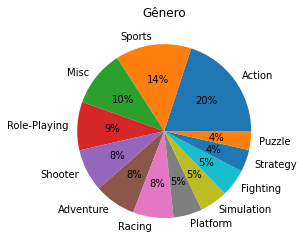

In [116]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.pie(df1_genre_porcent['Genre'], labels = df1_genre_porcent.index, autopct='%.0f%%')
ax.set_title('Gênero')
plt.show()

In [133]:
filtered_df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
...,...,...,...,...,...,...,...,...,...,...,...
16574,16577,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008.0,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01
16577,16580,Damnation,PC,2009.0,Shooter,Codemasters,0.00,0.01,0.00,0.00,0.01
16581,16584,Fit & Fun,Wii,2011.0,Sports,Unknown,0.00,0.01,0.00,0.00,0.01
16585,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01


In [173]:
import numpy as np

#df_year_sales = filtered_df1[['Platform','Year', 'Global_Sales']].groupby('Platform', as_index = True).agg({ 'Global_Sales': np.mean}).reset_index()
    
df_year_sales_ps3 = df_ps3.groupby('Year').agg({ 'Global_Sales': np.mean}).sort_values(by='Global_Sales', ascending=False).reset_index()
df_year_sales_wii = df_wii.groupby('Year').agg({ 'Global_Sales': np.mean}).sort_values(by='Global_Sales', ascending=False).reset_index()
df_year_sales_x360 = df_x360.groupby('Year').agg({ 'Global_Sales': np.mean}).sort_values(by='Global_Sales', ascending=False).reset_index()
df_year_sales_pc = df_pc.groupby('Year').agg({ 'Global_Sales': np.mean}).sort_values(by='Global_Sales', ascending=False).reset_index()


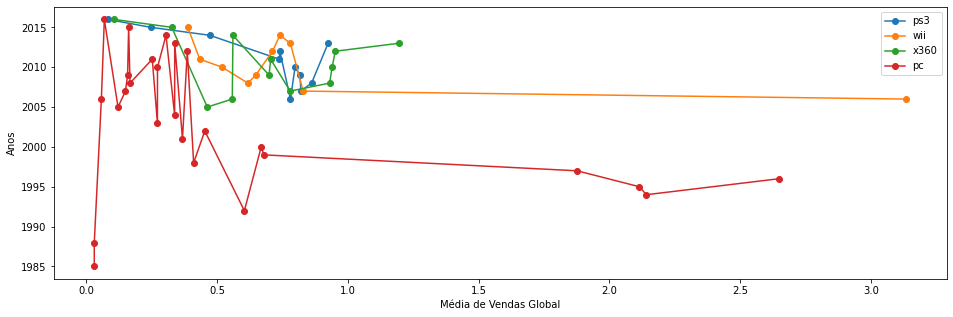

In [180]:
plt.figure(figsize=(16, 5))

plt.plot(df_year_sales_ps3['Global_Sales'], df_year_sales_ps3['Year'], label='ps3', marker='o')
plt.plot(df_year_sales_wii['Global_Sales'], df_year_sales_wii['Year'], label='wii', marker='o')
plt.plot(df_year_sales_x360['Global_Sales'], df_year_sales_x360['Year'], label='x360', marker='o')
plt.plot(df_year_sales_pc['Global_Sales'], df_year_sales_pc['Year'], label='pc', marker='o')
plt.ylabel('Anos')
plt.xlabel('Média de Vendas Global')
plt.legend()

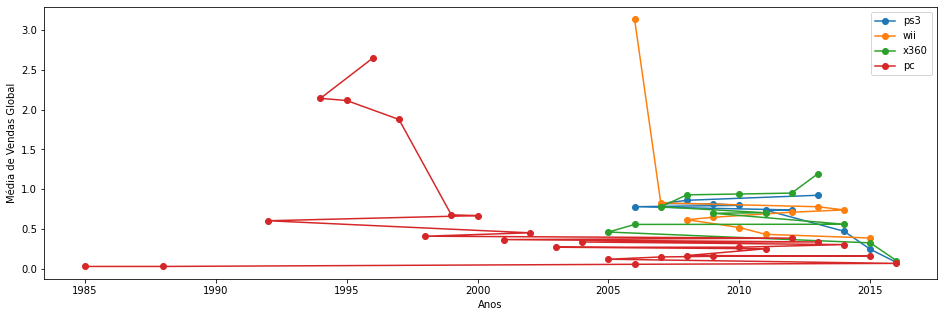

In [183]:
plt.figure(figsize=(16, 5))

plt.plot(df_year_sales_ps3['Year'], df_year_sales_ps3['Global_Sales'], label='ps3', marker='o')
plt.plot(df_year_sales_wii['Year'], df_year_sales_wii['Global_Sales'], label='wii', marker='o')
plt.plot(df_year_sales_x360['Year'], df_year_sales_x360['Global_Sales'], label='x360', marker='o')
plt.plot(df_year_sales_pc['Year'], df_year_sales_pc['Global_Sales'], label='pc', marker='o')
plt.xlabel('Anos')
plt.ylabel('Média de Vendas Global')
plt.legend()

**Questão 3**

Considerando os dados do dataset fish.csv, faça uma análise exploratória dos dados, criando:


1.Vários gráficos de dispersão (em uma mesma figura) combinando cada par de característica (feature) dos peixes, e atribuindo uma cor diferente para cada espécie.

2.Crie um gráfico de distribuição da largura dos peixes (Width). Não deixe de incluir o KDE.

3.Crie um mapa de calor que apresente a correlação entre cada feature do peixe. Anote os dados no gráfico e utilize o cmap=coolwarm.

In [186]:
df2 = pd.read_csv('fish.csv')
df2

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


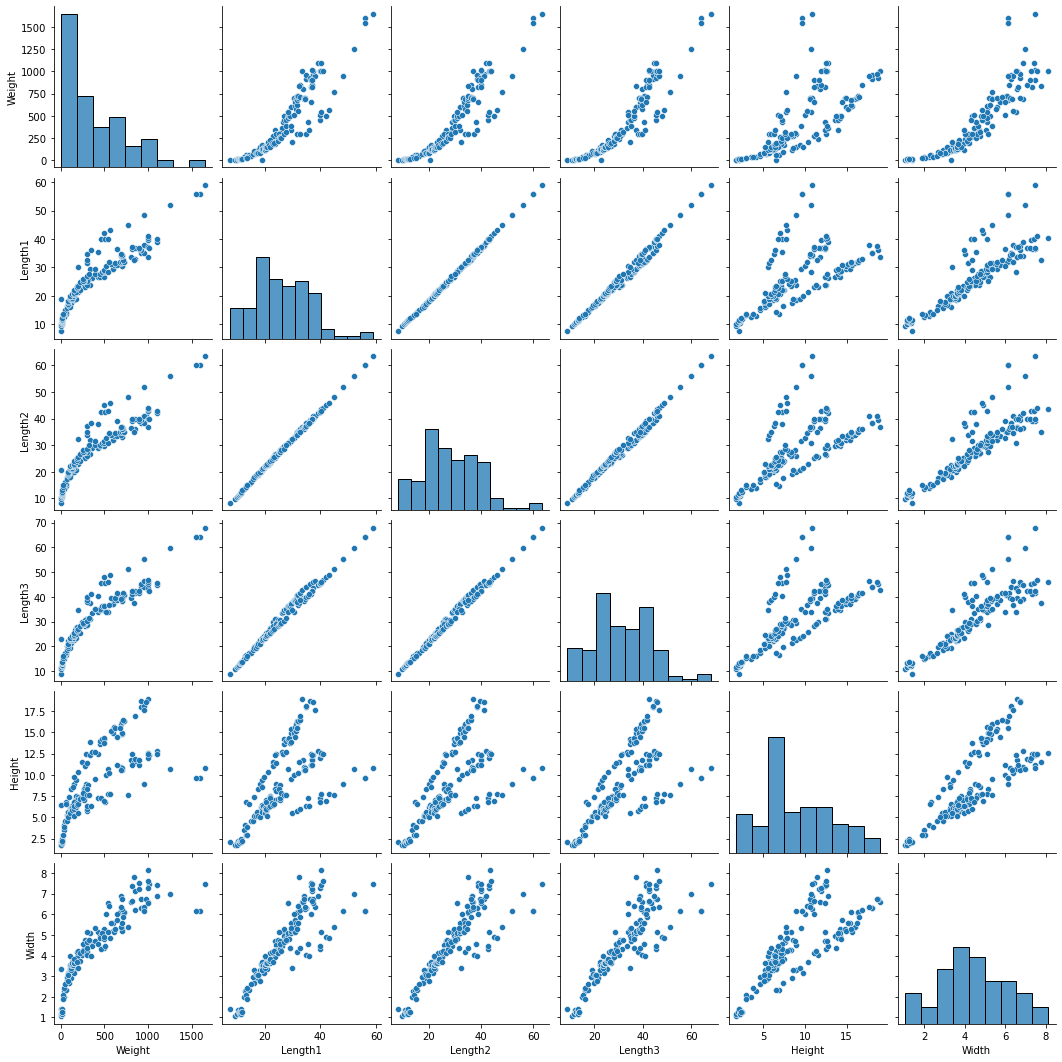

In [187]:
sns.pairplot(df2)

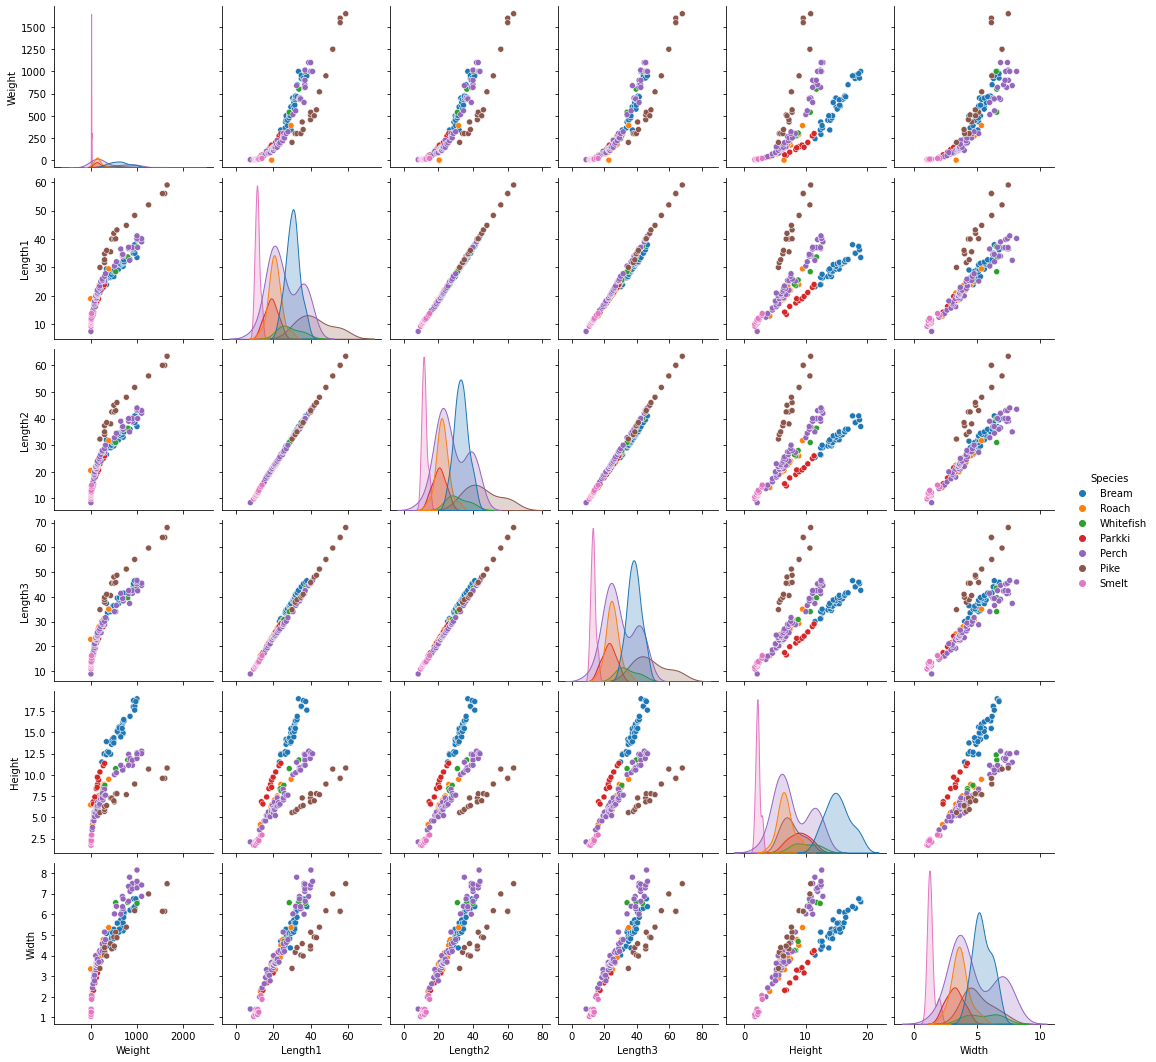

In [188]:
sns.pairplot(df2, hue='Species')

<AxesSubplot:xlabel='Width', ylabel='Count'>

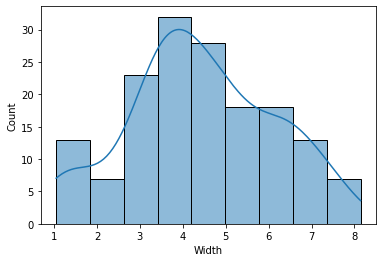

In [189]:
sns.histplot(data=df2, x='Width', kde=True)


<AxesSubplot:>

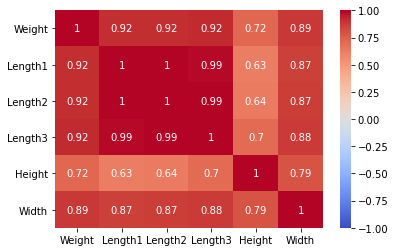

In [190]:
sns.heatmap(df2.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

**Questão 4**

Utilizando o dataset de crimes em São Francisco (crimes.csv), mostre 4 gráficos que indicam as localidades dos crimes (dispersão). Crie os 4 gráficos em uma mesma figura e axes diferentes, de tal forma que exista 1 gráfico para cada período do dia (manhã, tarde, noite e madrugada). Além disso, mostre para cada categoria do crime uma cor diferente. Realize os processamentos necessários para criação dos gráficos.

Dicas de parâmetros:
    
Tamanho da figura: 12 x 12 polegadas

Tamanho do ponto (parâmetro size): 0.5

In [204]:
import pandas as pd
df_crimes = pd.read_csv('crimes.csv', sep = '|', header = 0)

In [205]:
df_crimes

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,periodo,resolucao
0,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134,noite,outro
1,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,Friday,01/29/2016 12:00:00 AM,22:30,TARAVAL,NONE,1200 Block of 19TH AV,-122.477377,37.764478,"(37.7644781578695, -122.477376524003)",16008686306240,noite,outro
2,140776777,ASSAULT,AGGRAVATED ASSAULT WITH A GUN,Thursday,09/15/2016 12:00:00 AM,07:40,INGLESIDE,"ARREST, BOOKED",SILVER AV / CAMELLIA AV,-122.432326,37.729271,"(37.7292705199592, -122.432325871028)",14077677704011,manha,preso
3,160004558,ASSAULT,BATTERY WITH SERIOUS INJURIES,Saturday,01/02/2016 12:00:00 AM,16:40,MISSION,NONE,VALENCIA ST / 26TH ST,-122.420355,37.748906,"(37.7489063051829, -122.420354780861)",16000455804136,tarde,outro
4,160004655,ASSAULT,BATTERY,Saturday,01/02/2016 12:00:00 AM,17:05,INGLESIDE,NONE,900 Block of GENEVA AV,-122.439910,37.715765,"(37.715765426995, -122.439909766772)",16000465504134,tarde,outro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68989,160823994,ASSAULT,BATTERY,Sunday,10/09/2016 12:00:00 AM,21:15,MISSION,NONE,18TH ST / MISSION ST,-122.419360,37.761836,"(37.7618358012376, -122.419360352761)",16082399404134,noite,outro
68990,160858327,ASSAULT,BATTERY,Friday,10/21/2016 12:00:00 AM,13:30,MISSION,NONE,3400 Block of 18TH ST,-122.419749,37.761867,"(37.7618672648972, -122.419748993977)",16085832704134,tarde,outro
68991,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134,noite,outro
68992,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372,noite,outro


<AxesSubplot:xlabel='X', ylabel='Y'>

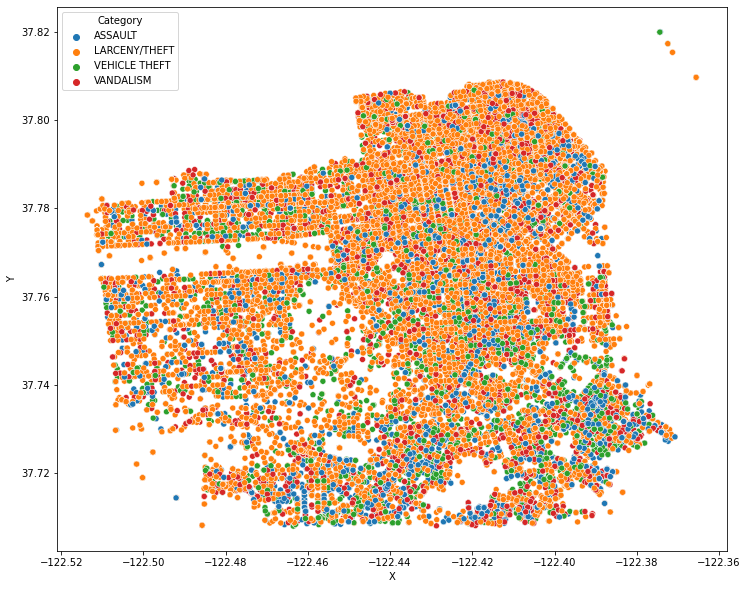

In [220]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_crimes, x = df_crimes['X'], y = df_crimes['Y'], hue='Category')

In [229]:
df_ASSAULT = df_crimes.loc[df_crimes['Category'] == 'ASSAULT']
df_ASSAULT

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,periodo,resolucao
0,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134,noite,outro
2,140776777,ASSAULT,AGGRAVATED ASSAULT WITH A GUN,Thursday,09/15/2016 12:00:00 AM,07:40,INGLESIDE,"ARREST, BOOKED",SILVER AV / CAMELLIA AV,-122.432326,37.729271,"(37.7292705199592, -122.432325871028)",14077677704011,manha,preso
3,160004558,ASSAULT,BATTERY WITH SERIOUS INJURIES,Saturday,01/02/2016 12:00:00 AM,16:40,MISSION,NONE,VALENCIA ST / 26TH ST,-122.420355,37.748906,"(37.7489063051829, -122.420354780861)",16000455804136,tarde,outro
4,160004655,ASSAULT,BATTERY,Saturday,01/02/2016 12:00:00 AM,17:05,INGLESIDE,NONE,900 Block of GENEVA AV,-122.439910,37.715765,"(37.715765426995, -122.439909766772)",16000465504134,tarde,outro
6,160006071,ASSAULT,THREATS AGAINST LIFE,Sunday,01/03/2016 12:00:00 AM,09:38,RICHMOND,"ARREST, BOOKED",FULTON ST / 47TH AV,-122.507750,37.771494,"(37.7714939969416, -122.507750131004)",16000607119057,manha,preso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68987,160661158,ASSAULT,BATTERY,Tuesday,08/16/2016 12:00:00 AM,10:00,BAYVIEW,NONE,1300 Block of EVANS AV,-122.382742,37.739945,"(37.7399451834026, -122.382742108888)",16066115804134,manha,outro
68988,160801508,ASSAULT,BATTERY,Sunday,10/02/2016 12:00:00 AM,18:25,SOUTHERN,NONE,200 Block of 8TH ST,-122.411272,37.776033,"(37.7760329501244, -122.411271940537)",16080150804134,noite,outro
68989,160823994,ASSAULT,BATTERY,Sunday,10/09/2016 12:00:00 AM,21:15,MISSION,NONE,18TH ST / MISSION ST,-122.419360,37.761836,"(37.7618358012376, -122.419360352761)",16082399404134,noite,outro
68990,160858327,ASSAULT,BATTERY,Friday,10/21/2016 12:00:00 AM,13:30,MISSION,NONE,3400 Block of 18TH ST,-122.419749,37.761867,"(37.7618672648972, -122.419748993977)",16085832704134,tarde,outro


In [230]:
df_LARCENY_THEFT = df_crimes.loc[df_crimes['Category'] == 'LARCENY/THEFT']

In [231]:
df_VEHICLE_THEFT = df_crimes.loc[df_crimes['Category'] == 'VEHICLE THEFT']

In [232]:
df_VANDALISM = df_crimes.loc[df_crimes['Category'] == 'VANDALISM']

<Figure size 864x720 with 0 Axes>

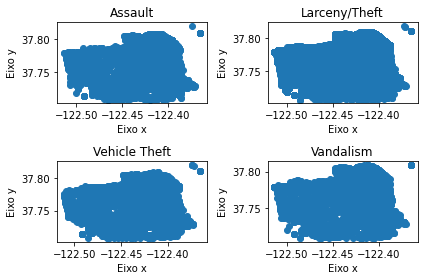

In [242]:
plt.figure(figsize=(12, 10))
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

figure, axes = plt.subplots(2, 2)

axes[0, 0].scatter(df_ASSAULT['X'], df_ASSAULT['Y'], marker="o")
axes[0, 0].set_xlabel('Eixo x')
axes[0, 0].set_ylabel('Eixo y')
axes[0, 0].set_title('Assault')

axes[0, 1].scatter(df_LARCENY_THEFT['X'], df_LARCENY_THEFT['Y'], marker="o")
axes[0, 1].set_xlabel('Eixo x')
axes[0, 1].set_ylabel('Eixo y')
axes[0, 1].set_title('Larceny/Theft')

axes[1, 0].scatter(df_VEHICLE_THEFT['X'], df_VEHICLE_THEFT['Y'], marker="o")
axes[1, 0].set_xlabel('Eixo x')
axes[1, 0].set_ylabel('Eixo y')
axes[1, 0].set_title('Vehicle Theft')

axes[1, 1].scatter(df_VANDALISM['X'], df_VANDALISM['Y'], marker="o")
axes[1, 1].set_xlabel('Eixo x')
axes[1, 1].set_ylabel('Eixo y')
axes[1, 1].set_title('Vandalism')

plt.tight_layout()

<AxesSubplot:xlabel='Category', ylabel='Count'>

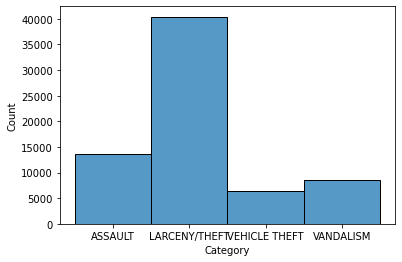

In [250]:
sns.histplot(data=df_crimes, x='Category')

<AxesSubplot:xlabel='periodo', ylabel='Count'>

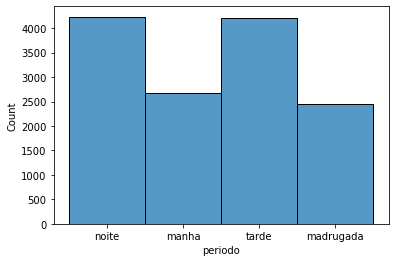

In [251]:
sns.histplot(data=df_ASSAULT, x='periodo')

<AxesSubplot:xlabel='periodo', ylabel='count'>

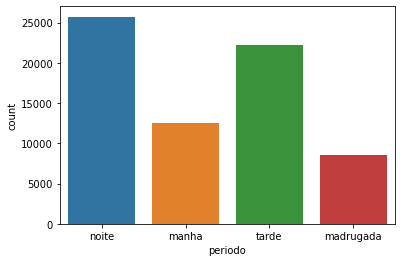

In [253]:
sns.countplot(data=df_crimes, x='periodo')

In [255]:
df_manha = df_crimes.loc[df_crimes['periodo'] == 'manha']
df_manha

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,periodo,resolucao
2,140776777,ASSAULT,AGGRAVATED ASSAULT WITH A GUN,Thursday,09/15/2016 12:00:00 AM,07:40,INGLESIDE,"ARREST, BOOKED",SILVER AV / CAMELLIA AV,-122.432326,37.729271,"(37.7292705199592, -122.432325871028)",14077677704011,manha,preso
6,160006071,ASSAULT,THREATS AGAINST LIFE,Sunday,01/03/2016 12:00:00 AM,09:38,RICHMOND,"ARREST, BOOKED",FULTON ST / 47TH AV,-122.507750,37.771494,"(37.7714939969416, -122.507750131004)",16000607119057,manha,preso
8,160007132,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,01/03/2016 12:00:00 AM,09:00,CENTRAL,NONE,GREEN ST / BATTERY ST,-122.401433,37.800457,"(37.8004566471039, -122.401432754722)",16000713207021,manha,outro
16,160011177,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,01/04/2016 12:00:00 AM,08:00,TENDERLOIN,NONE,300 Block of EDDY ST,-122.412931,37.783834,"(37.7838344374141, -122.412930522059)",16001117728160,manha,outro
23,160013913,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Wednesday,01/06/2016 12:00:00 AM,06:00,INGLESIDE,NONE,100 Block of HIGHLAND AV,-122.422067,37.737362,"(37.7373623605213, -122.422067184937)",16001391328150,manha,outro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68975,161013716,ASSAULT,BATTERY,Wednesday,12/14/2016 12:00:00 AM,11:05,SOUTHERN,NONE,COLUMBIASQUARE ST / FOLSOM ST,-122.406440,37.777857,"(37.7778567118034, -122.406439890677)",16101371604134,manha,outro
68976,161017188,ASSAULT,BATTERY,Wednesday,12/14/2016 12:00:00 AM,08:30,BAYVIEW,NONE,1800 Block of EGBERT AV,-122.400756,37.727208,"(37.727208031298, -122.400756491094)",16101718804134,manha,outro
68984,166167891,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,07/22/2016 12:00:00 AM,09:30,PARK,NONE,14TH ST / NOE ST,-122.433409,37.767460,"(37.7674598906238, -122.433409294261)",16616789106244,manha,outro
68987,160661158,ASSAULT,BATTERY,Tuesday,08/16/2016 12:00:00 AM,10:00,BAYVIEW,NONE,1300 Block of EVANS AV,-122.382742,37.739945,"(37.7399451834026, -122.382742108888)",16066115804134,manha,outro


In [256]:
df_manha = df_crimes.loc[df_crimes['periodo'] == 'manha']
df_tarde = df_crimes.loc[df_crimes['periodo'] == 'tarde']
df_noite = df_crimes.loc[df_crimes['periodo'] == 'noite']
df_madrugada = df_crimes.loc[df_crimes['periodo'] == 'madrugada']

(array([2683.,    0.,    0., 1104.,    0.,    0., 1483.,    0.,    0.,
        7209.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

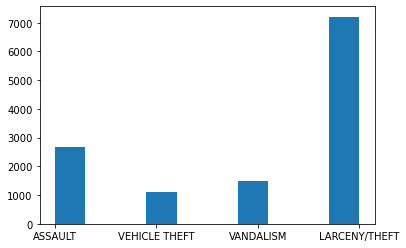

In [258]:
plt.hist(df_manha['Category'])

<Figure size 1872x1296 with 0 Axes>

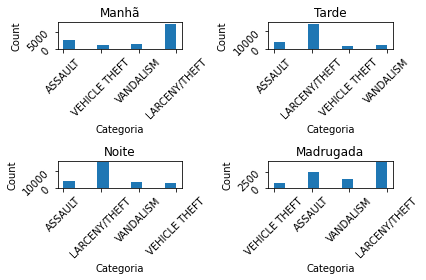

In [281]:
plt.figure(figsize=(26, 18))
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt


figure, axes = plt.subplots(2, 2)


axes[0, 0].hist(df_manha['Category'])
axes[0, 0].set_xlabel('Categoria')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Manhã')
axes[0, 0].tick_params(labelrotation=45)

axes[0, 1].hist(df_tarde['Category'])
axes[0, 1].set_xlabel('Categoria')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Tarde')
axes[0, 1].tick_params(labelrotation=45)

axes[1, 0].hist(df_noite['Category'])
axes[1, 0].set_xlabel('Categoria')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Noite')
axes[1, 0].tick_params(labelrotation=45)

axes[1, 1].hist(df_madrugada['Category'])
axes[1, 1].set_xlabel('Categoria')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Madrugada')
axes[1, 1].tick_params(labelrotation=45)

plt.tight_layout()

